In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert to numeric, "?" becomes NaN
df.dropna(subset=['horsepower'], inplace=True)

In [27]:
df.info()
df = df.drop('car name' , axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [28]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict MPG on the test set
y_pred = model.predict(X_test)

In [32]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 2.4197802491974487


In [33]:
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707]
Intercept: -18.49936112872476


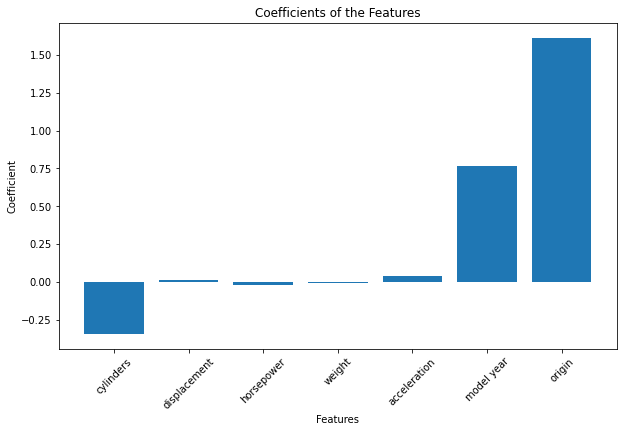

In [34]:
# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficients of the Features')
plt.xticks(rotation=45)
plt.show()